# How do we represent half cell redox reactions as strings?

* Comparing SMILES/SMARTS/SMIRKS
    * https://jcheminf.biomedcentral.com/track/pdf/10.1186/s13321-020-00466-z.pdf

---

In [161]:
#INITIALIZE MODULES:
#===========================================
import pandas as pd
import numpy as np
import psycopg2
from sqlalchemy import create_engine
from IPython.display import Image
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph

#User defined
import functions.fn_sql as fn_sql
import functions.fn_doi as fn_doi
import functions.fn_chem as fn_chem

import session_info
session_info.show()

---
# CIRPY PACKAGE: INCHI

https://cirpy.readthedocs.io/en/latest/guide/gettingstarted.html

FORMATS:

stdinchi
stdinchikey
inchi
smiles
ficts
ficus
uuuuu
hashisy
sdf
names
iupac_name
cas
formula


In [28]:
def make_compound_dict(identifier,class_type,abbreviation):
    import cirpy

    mol = dict()
    mol['abbreviation'] = abbreviation
    mol['iupac'] = cirpy.resolve(identifier, 'iupac_name')
    mol['formula'] = cirpy.resolve(identifier, 'formula')
    mol['smiles'] = cirpy.resolve(identifier, 'smiles')
    mol['inchi'] = cirpy.resolve(identifier, 'inchi')
    mol['stdinchi'] = cirpy.resolve(identifier, 'stdinchi')
    mol['stdinchikey'] = cirpy.resolve(identifier, 'stdinchikey')
    mol['cas'] = cirpy.resolve(identifier, 'cas')
    mol['class'] = class_type
    mol['molecular_weight'] = cirpy.resolve(identifier, 'mw')
    mol['name'] = cirpy.resolve(identifier, 'names')

    return mol

identifier = 'OCCN(CCO)C(CO)(CO)CO'
class_type = 'active'
abbreviation = 'bistris'

mol = make_compound_dict(identifier,class_type,abbreviation)
display(mol)

{'abbreviation': 'bistris',
 'iupac': '2-(Bis(2-hydroxyethyl)amino)-2-(hydroxymethyl)propane-1,3-diol',
 'formula': 'C8H19NO5',
 'smiles': 'OCCN(CCO)C(CO)(CO)CO',
 'inchi': 'InChI=1/C8H19NO5/c10-3-1-9(2-4-11)8(5-12,6-13)7-14/h10-14H,1-7H2',
 'stdinchi': 'InChI=1S/C8H19NO5/c10-3-1-9(2-4-11)8(5-12,6-13)7-14/h10-14H,1-7H2',
 'stdinchikey': 'InChIKey=OWMVSZAMULFTJU-UHFFFAOYSA-N',
 'cas': '6976-37-0',
 'class': 'active',
 'molecular_weight': '209.2418',
 'name': ['2-(Bis(2-hydroxyethyl)amino)-2-(hydroxymethyl)propane-1,3-diol',
  '2-(bis(2-hydroxyethyl)amino)-2-methylol-propane-1,3-diol',
  '6976-37-0',
  'NSC119932',
  'NSC 119932',
  'CHEBI:41250',
  '2-[bis(2-hydroxyethyl)amino]-2-(hydroxymethyl)propane-1,3-diol',
  'B9754_SIGMA',
  'BIS-2-HYDROXY-IMINO-TRIS-HYDROXYMETHYL-METHANE',
  'B4429_SIGMA',
  '2-(bis(2-hydroxyethyl)amino)-2-(hydroxymethyl)-1,3-propanediol',
  '1,3-Propanediol, 2-[bis(2-hydroxyethyl)amino]-2-(hydroxymethyl)-',
  "2,2-Bis(hydroxymethyl)-2,2',2''-nitrilotriethanol",

---
# Single `compound`

* Choose compounds based on chemspider IDs (csid)
* Search compounds at http://www.chemspider.com/

,compound_id,common_name,formula,smiles,molecular_weight,nominal_mass,abbreviation,image_url,active,support,solvent
0,937,Water,H_{2}O,O,18.0153,18,H2O,http://www.chemspider.com/ImagesHandler.ashx?i...,0,0,1


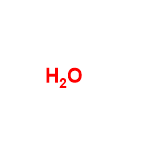

In [162]:
# SINGLE COMPOUND:
#===========================================
#::::::::::::::::::::::::::::::::::::::
chemspider_id = 937 
active = 0 #boolean
support = 0
solvent = 1
abbreviation = 'H2O'
#::::::::::::::::::::::::::::::::::::::
mol,compound_image = fn_chem.make_compound_dict(chemspider_id,active,support,solvent,abbreviation)
df = pd.DataFrame([mol])
display(df)
display(compound_image) #image

---
# Chemical reaction string (Redox rxns)

* using SMARTS?

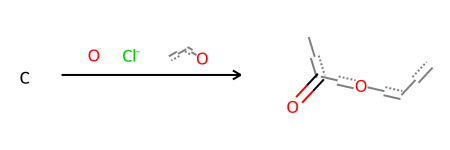

In [200]:
#RXN: RDKit sample code:
#===========================================
#https://towardsdatascience.com/basic-molecular-representation-for-machine-learning-b6be52e9ff76

from rdkit.Chem import AllChem
smarts = '[OH2]>>[Fe+3]' #wtf is an electron
smarts = 'C>[OH2].[Cl-].OCC>CC(=O)OCC'
rxn = AllChem.ReactionFromSmarts(smarts)
display(rxn)

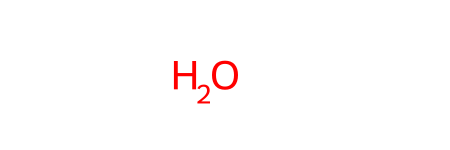

In [228]:
#SMILES molecules
#===========================================

smiles = 'O'
mol = Chem.MolFromSmiles(smiles)
display(mol)